In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std       # 앞의 명령문과 함께 train_data = (train_data-mean) / std
test_data -= mean
test_data /= std

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) 
                        # train_data.shape은 (404, 13)이기 때문에 .shape[1]은 13!
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])    # 컴파일!
    return model

In [27]:
import numpy as np
a = np.array([[1, 2], [3, 4], [7, 8]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [7, 8],
       [5, 6]])

In [6]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6])
np.concatenate((a, b), axis=0)

array([1, 2, 3, 4, 5, 6])

In [20]:
a = np.array([1, 2])
b = np.array([5, 6])
np.concatenate((a, b), axis=0)

array([1, 2, 5, 6])

In [9]:
import numpy as np
num_epochs = 200
k=4
num_val_samples = len(train_data) // k
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                        train_data[(i+1) * num_val_samples:]])
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                           train_targets[(i+1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                       validation_data=(val_data, val_targets),
                       epochs = num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae'] #['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


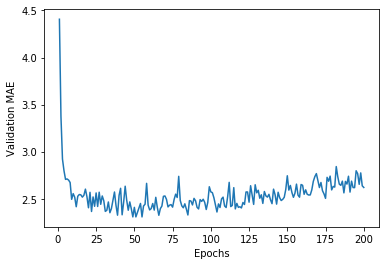

In [11]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

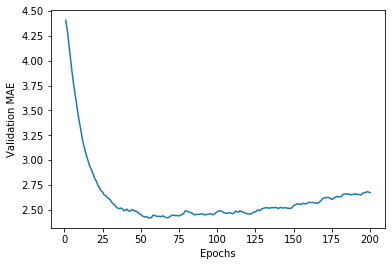

In [12]:
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor+ point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history)
#print(average_mae_history)
#print(smooth_mae_history)
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()